 Wheat and the chessboard problem

《Sample code》


In [4]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4 Улаан буудайг хулд модны тавцан дээр байрлуул (жагсаалт)):{}".format(small_board_list))

4 Улаан буудайг хулд модны тавцан дээр байрлуул (жагсаалт)）：[1, 2, 4, 8]


In [5]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる(ndarray):{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


[Question 1] Number of wheat on a 2x2 square chessboard

In [6]:
small_board_list = [1, 2, 4, 8]
small_board_ndarray = np.array(small_board_list)

# Reshape the array into a 2x2 chessboard
chessboard_ndarray = small_board_ndarray.reshape(2, 2)

print("2x2マスの板に小麦を並べる(ndarray): \n{}".format(chessboard_ndarray))

2x2マスの板に小麦を並べる（ndarray）：
[[1 2]
 [4 8]]


[Problem 2] Extension to n × m squares

In [8]:
import numpy as np

def wheat_chessboard(n, m):
    board_size = n * m
    small_board_list = [1]
    for _ in range(board_size - 1):
        small_board_list.append(2*small_board_list[-1])
    return np.array(small_board_list).reshape(n, m)
wheat_5x5 = wheat_chessboard(5, 5)
print("8x8マスの板に小麦を並べる (ndarray):\n{}".format(wheat_5x5))

8x8マスの板に小麦を並べる (ndarray):
[[       1        2        4        8       16]
 [      32       64      128      256      512]
 [    1024     2048     4096     8192    16384]
 [   32768    65536   131072   262144   524288]
 [ 1048576  2097152  4194304  8388608 16777216]]


[Question 3] Total number of wheat

8x8マスの板に並べた小麦の総数： 1.8446744073709552e+19

 mean of each column： [9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


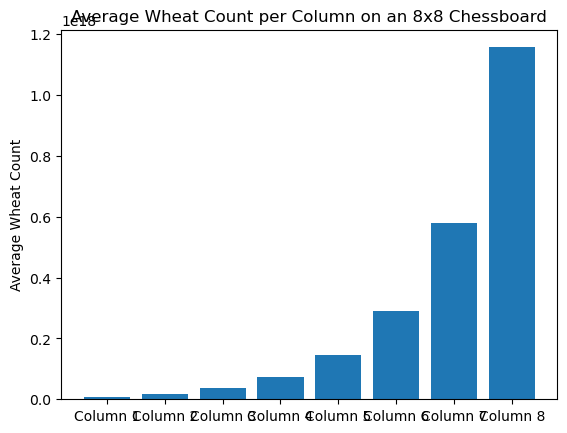

In [11]:
wheat_8x8 = wheat_chessboard(8, 8)
total_wheat = np.sum(wheat_8x8)
print("8x8 total:", total_wheat)
column_average = wheat_8x8.mean(axis=0)
print("\n mean of each column:", column_average)
import matplotlib.pyplot as plt

x = np.arange(8)
plt.bar(x, column_average)
plt.xticks(x, [f"Column {i+1}" for i in range(8)])
plt.ylabel("Average Wheat Count")
plt.title("Average Wheat Count per Column on an 8x8 Chessboard")
plt.show()


[Question 4] Heat map of the number of wheat

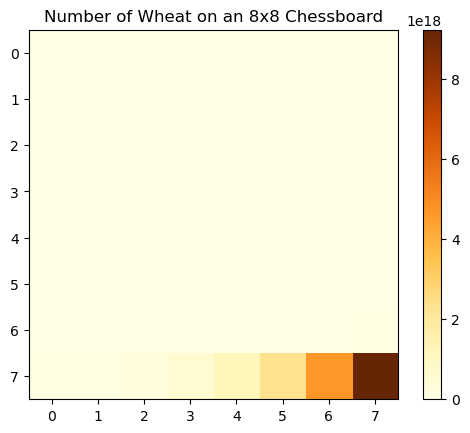

In [21]:
import matplotlib.pyplot as plt

wheat_8x8 = wheat_chessboard(8, 8)

plt.imshow(wheat_8x8, cmap='YlOrBr')
plt.colorbar()
plt.title("Number of Wheat on an 8x8 Chessboard")
plt.show()


[Question 5] How many times the second half is the first half?

In [24]:
wheat_8x8 = wheat_chessboard(8, 8)

first_half = wheat_8x8[:4].sum()
second_half = wheat_8x8[4:].sum()

result = first_half * second_half
print("Number of wheat in 1st quadrant:", first_half)
print("Number of wheat in quadrant 2:", second_half)
print("Number of wheat in 1st quadrant x Number of wheat in 2nd quadrant:", result)

Number of wheat in 1st quadrant: 4294967295.0
Number of wheat in quadrant 2: 1.8446744069414584e+19
Number of wheat in 1st quadrant x Number of wheat in 2nd quadrant: 7.922816247737085e+28


[Problem 6] Extension to n × m squares by other calculation methods

In [9]:
import numpy as np

def wheat_chessboard_append(n, m):
    small_board_list = np.array([1])
    for i in range(1, n * m):
        small_board_list = np.append(small_board_list, 2 * small_board_list[i-1])
    wheat_board = small_board_list.reshape((n, m))
    return wheat_board

wheat_board_append = wheat_chessboard_append(8, 8)
print("Total number of wheat using np.append() method: ", np.sum(wheat_board_append))



Total number of wheat using np.append() method:  -1


C:\Users\EnkhturGanboldNS\AppData\Local\Temp\ipykernel_17824\2684709859.py:6: RuntimeWarning: overflow encountered in long_scalars
  small_board_list = np.append(small_board_list, 2 * small_board_list[i-1])


[Question 7] Comparison of calculation time

In [10]:
%%timeit
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = a + b

2.74 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
import numpy as np

def wheat_chessboard_append(n, m):
    small_board_list = np.array([1])
    for i in range(1, n * m):
        small_board_list = np.append(small_board_list, 2 * small_board_list[i-1])
    wheat_board = small_board_list.reshape((n, m))
    return wheat_board

n, m = 8, 8
wheat_board_append = wheat_chessboard_append(n, m)
print("Total number of wheat using np.append() method: ", np.sum(wheat_board_append))


Total number of wheat using np.append() method:  -1


C:\Users\EnkhturGanboldNS\AppData\Local\Temp\ipykernel_17824\410422286.py:6: RuntimeWarning: overflow encountered in long_scalars
  small_board_list = np.append(small_board_list, 2 * small_board_list[i-1])
